# 💬👍👎 **Airbnb Listings Sentiment Classification**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Load the dataset** 🗂

In [3]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/Datasets/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Question 1: Study Over Time** 🤗

### **Data Pre-processing 💽**

📝 We decided to use data only from the last month of each year (April 2019 and September 2023) because it already contained all the data from the previous months. This allowed us to include all necessary information without redundancy, making our analysis more efficient.

#### **2019**

In [4]:
# Paths to the CSV files for each month
review_paths = {
    'April': '/content/drive/My Drive/Datasets/data/2019/april/reviews.csv',
    # 'February': '/content/drive/My Drive/Datasets/data/2019/febrouary/reviews.csv',
    # 'March':  '/content/drive/My Drive/Datasets/data/2019/march/reviews.csv'
}

neighbourhood_paths = {
    'April': '/content/drive/My Drive/Datasets/data/2019/april/listings.csv',
    # 'February': '/content/drive/My Drive/Datasets/data/2019/febrouary/listings.csv',
    # 'March':  '/content/drive/My Drive/Datasets/data/2019/march/listings.csv'
}

merged_dataframes = []

for month in review_paths.keys():
    # Get 'listing_id' and 'comments' columns
    review_df = pd.read_csv(review_paths[month], usecols=['listing_id', 'comments'])

    # Get 'neighbourhood_cleansed' and 'id' columns
    neighbourhood_df = pd.read_csv(neighbourhood_paths[month], usecols=['neighbourhood_cleansed', 'id'])

    # Merge the review and neighbourhood dataframes on 'listing_id' and 'id'
    merged_df = pd.merge(review_df, neighbourhood_df, left_on='listing_id', right_on='id')

    # Append to the list of merged dataframes
    merged_dataframes.append(merged_df)

# Concatenate the merged dataframes
combined_df_2019 = pd.concat(merged_dataframes, ignore_index=True)

# Drop 'id' column
combined_df_2019 = combined_df_2019.drop(columns=['id'])

# Remove rows where 'comments' column is empty
combined_df_2019 = combined_df_2019.dropna(subset=['comments'])

# Reset the index after filtering
combined_df_2019 = combined_df_2019.reset_index(drop=True)

# Display the resulting dataframe
combined_df_2019.head()

# Save the final dataframe to a CSV file
# combined_df_2019.to_csv('/content/drive/My Drive/Datasets/data/2019/english_reviews.csv', index=False)

,listing_id,comments,neighbourhood_cleansed
0,10595,"The apartment was wonderful, fully equiped, be...",ΑΜΠΕΛΟΚΗΠΟΙ
1,10595,Emmanouil was an excellent host. He provided u...,ΑΜΠΕΛΟΚΗΠΟΙ
2,10595,"Manos is a very good host, he is kind and help...",ΑΜΠΕΛΟΚΗΠΟΙ
3,10595,"Our stay in Emmanouil home was comfortable, qu...",ΑΜΠΕΛΟΚΗΠΟΙ
4,10595,Fantastic accommodation very well located to v...,ΑΜΠΕΛΟΚΗΠΟΙ


#### **2023**

In [5]:
# Paths to the CSV files for each month
review_paths = {
    # 'March': '/content/drive/My Drive/Datasets/data/2023/march/reviews.csv',
    # 'June': '/content/drive/My Drive/Datasets/data/2023/june/reviews.csv',
    'September':  '/content/drive/My Drive/Datasets/data/2023/september/reviews.csv'
}

neighbourhood_paths = {
    # 'March': '/content/drive/My Drive/Datasets/data/2023/march/listings.csv',
    # 'June': '/content/drive/My Drive/Datasets/data/2023/june/listings.csv',
    'September': '/content/drive/My Drive/Datasets/data/2023/september/listings.csv'
}

merged_dataframes_2023 = []

for month in review_paths.keys():
    # Get 'listing_id' and 'comments' columns
    review_df = pd.read_csv(review_paths[month], usecols=['listing_id', 'comments'])

    # Get 'neighbourhood_cleansed' and 'id' columns
    neighbourhood_df = pd.read_csv(neighbourhood_paths[month], usecols=['neighbourhood_cleansed', 'id'])

    # Merge the review and neighbourhood dataframes on 'listing_id' and 'id'
    merged_df = pd.merge(review_df, neighbourhood_df, left_on='listing_id', right_on='id')

    # Append to the list of merged dataframes
    merged_dataframes_2023.append(merged_df)

# Concatenate the merged dataframes
combined_df_2023 = pd.concat(merged_dataframes_2023, ignore_index=True)

# Drop 'id' column
combined_df_2023 = combined_df_2023.drop(columns=['id'])

# Remove rows where 'comments' column is empty
combined_df_2023 = combined_df_2023.dropna(subset=['comments'])

# Reset the index after filtering
combined_df_2023 = combined_df_2023.reset_index(drop=True)

# Display the resulting dataframe
combined_df_2023.head()

# Save the final dataframe to a CSV file
# combined_df_2023.to_csv('/content/drive/My Drive/Datasets/data/2023/english_reviews.csv', index=False)

,listing_id,comments,neighbourhood_cleansed
0,10595,"The apartment was wonderful, fully equiped, be...",ΑΜΠΕΛΟΚΗΠΟΙ
1,10595,Emmanouil was an excellent host. He provided u...,ΑΜΠΕΛΟΚΗΠΟΙ
2,695173,"My wife, my daughter and I spent five days of ...",ΝΕΟΣ ΚΟΣΜΟΣ
3,695173,We had a great stay at Soula's apartment. We l...,ΝΕΟΣ ΚΟΣΜΟΣ
4,695173,"Beautiful, clean apartment with plenty of spac...",ΝΕΟΣ ΚΟΣΜΟΣ


Take a random sample of 2200 data.

In [6]:
# Display the size of the resulting dataframe
print("Shape of combined_df_2019:", combined_df_2019.shape)
# Display the size of the resulting dataframe
print("Shape of combined_df_2023:", combined_df_2023.shape)

# Randomly sample rows from combined_df_2023
sampled_df_2019 = combined_df_2019.sample(n=10000, random_state=42)
sampled_df_2023 = combined_df_2023.sample(n=10000, random_state=42)
# Display the resulting sampled dataframe
print(sampled_df_2019.head())
print(sampled_df_2023.head())

Shape of combined_df_2019: (287300, 3)
Shape of combined_df_2023: (560527, 3)
        listing_id                                           comments  \
142698    15046716  A good location for visiting all the famous to...   
250494    24362432  Great place, excellent location, they have bot...   
200808    19472607  The apartment was great and in a very good loc...   
106108    12079076  The hosts were very accommodating and helpful....   
152442    16038153  Excellent little place to stay in Athens.\nWal...   

        neighbourhood_cleansed  
142698  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  
250494  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  
200808             ΑΜΠΕΛΟΚΗΠΟΙ  
106108                   ΓΚΑΖΙ  
152442  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  
        listing_id                                           comments  \
101694    13842245  Très bon séjour chez Lito, communication très ...   
167859    19109115  The apartment was super clean, check in was ea...   
327933    30052958  Fenia has been a great host. The apartment was

#### **Data Cleaning 🧹**

📝 We remove punctuation, convert all characters to lowercase, remove symbols such as hashtags, emoticons, emojis, links and stopwords from the dataset. We only do the pre-processing steps for english comments.

In [7]:
import re
import nltk
from nltk.corpus import stopwords

# Ensure you download the stopwords if you haven't already
nltk.download('stopwords')

def clean_comments(comment):

    # Remove hashtags
    comment = re.sub(r'#\w+', '', comment)

    # Remove links
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)

    # Remove emojis and emoticons
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE)
    comment = emoji_pattern.sub(r'', comment)

    # Convert to lowercase
    comment = comment.lower()

    # Remove punctuation
    comment = re.sub(r'[^\w\s]', '', comment)

    # Split the text into words
    # comment = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    comment = ' '.join([word for word in comment.split() if word.lower() not in stop_words])

    return comment

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
!pip install langdetect

In [9]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Ensure consistent results
DetectorFactory.seed = 0

# Function to detect language and filter only English comments
def is_english(comment):
    try:
        return detect(comment) == 'en'
    except LangDetectException:
        return False

#### **2019**

In [10]:
# Apply the cleaning function to the comments column
sampled_df_2019['comments'] = sampled_df_2019['comments'].apply(clean_comments)

# Apply the language detection function and filter the DataFrame
sampled_df_2019 = sampled_df_2019[sampled_df_2019['comments'].apply(is_english)]

print(sampled_df_2019.shape)

sampled_df_2019 = sampled_df_2019.sample(n=1000, random_state=42)

sampled_df_2019.head()

(7675, 3)


,listing_id,comments,neighbourhood_cleansed
101070,11614090,panos awesome host responsive start offered se...,ΣΤΑΔΙΟ
95167,10898803,pictures lie spacious clean upscale condo hear...,ΖΑΠΠΕΙΟ
209883,20091938,sofia responsive gentle flexiblea perfect host...,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
200421,19420005,marios fast responsive polite guest house need...,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
284072,30391533,really nice place clean,ΝΕΟΣ ΚΟΣΜΟΣ


#### **2023**

In [11]:
# Apply the cleaning function to the comments column
sampled_df_2023['comments'] = sampled_df_2023['comments'].apply(clean_comments)

# Apply the language detection function and filter the DataFrame
sampled_df_2023 = sampled_df_2023[sampled_df_2023['comments'].apply(is_english)]

print(sampled_df_2023.shape)

sampled_df_2023 = sampled_df_2023.sample(n=1000, random_state=42)

sampled_df_2023.head()

(6993, 3)


,listing_id,comments,neighbourhood_cleansed
39068,7660473,tonia always responded fast great communicatio...,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ
250438,24930160,best airbnb stayed everything pristine host su...,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
534029,630395925819193175,prosbrsmooth operation hasselbrexcellent commu...,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
143785,18144362,cosy conveniently placed apartment heart touri...,ΚΕΡΑΜΕΙΚΟΣ
59886,9206258,liberty responsive helpful space clean appreci...,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ


### **Annotation Process**

📝 To annotate the 'comments' column in our data, we used a pre-trained BERT sentiment classifier, specifically the [phanerozoic/BERT-Sentiment-Classifier](https://huggingface.co/phanerozoic/BERT-Sentiment-Classifier) model. This model performs binary classification (negative/positive). We chose this binary classification approach because other three-class models we tested did not produce any neutral sentiments.

In [12]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Load the tokenizer and model
model_name = "phanerozoic/BERT-Sentiment-Classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Set up the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to truncate the text to the maximum token length
def truncate_text(text, tokenizer, max_length=512):
    encoded = tokenizer.encode_plus(text, truncation=True, max_length=max_length, return_tensors='pt')
    return tokenizer.decode(encoded['input_ids'][0], skip_special_tokens=True)

# Function to annotate sentiment for a chunk of data
def annotate_sentiment(df_chunk, tokenizer):
    label_to_sentiment = {"LABEL_0": "negative", "LABEL_1": "positive"}
    sentiments = []
    for comment in df_chunk['comments']:
        truncated_comment = truncate_text(comment, tokenizer)
        result = sentiment_pipeline(truncated_comment)[0]
        sentiments.append(label_to_sentiment[result['label']])
    df_chunk = df_chunk.copy()  # Make a copy to avoid the SettingWithCopyWarning
    df_chunk['sentiment'] = sentiments
    return df_chunk

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu




---


📝 After some experiments, we observed that the sentiments produced were not balanced, resulting in a large number of positive comments. To achieve a more balanced distribution of positive and negative sentiments, we decided to use the negative words library from the opinion lexicon. By identifying comments containing words from this library, we could change their sentiments to negative, ensuring a closer balance between positive and negative comments.

In [13]:
!pip install nltk

In [14]:
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [15]:
from nltk.corpus import opinion_lexicon

# Load the negative words from the opinion_lexicon
negative_words = set(opinion_lexicon.negative())

# Function to check if a comment contains any negative words
def contains_negative_words(comment):
    comment_lower = comment.lower()
    words = comment_lower.split()
    return any(word in negative_words for word in words)

**2019**

In [16]:
# Split the data into chunks
chunk_size = 500
chunks_2019 = [sampled_df_2019.iloc[i:i + chunk_size] for i in range(0, sampled_df_2019.shape[0], chunk_size)]

# Annotate sentiment for each chunk
annotated_chunks_2019 = [annotate_sentiment(chunk, tokenizer) for chunk in chunks_2019]

# Concatenate the annotated chunks
annotated_df_2019 = pd.concat(annotated_chunks_2019, ignore_index=True)

# Filter positive data
annotated_df_2019['sentiment'] = annotated_df_2019.apply(
    lambda row: 'negative' if row['sentiment'] == 'positive' and contains_negative_words(row['comments']) else row['sentiment'],
    axis=1
)

# Select required columns
final_df_2019 = annotated_df_2019[['listing_id', 'comments', 'sentiment', 'neighbourhood_cleansed']]

# Display the resulting dataframe
print(final_df_2019.head(200))

# Print the shape of the final dataframe
print(final_df_2019.shape)

     listing_id                                           comments sentiment  \
0      11614090  panos awesome host responsive start offered se...  positive   
1      10898803  pictures lie spacious clean upscale condo hear...  negative   
2      20091938  sofia responsive gentle flexiblea perfect host...  positive   
3      19420005  marios fast responsive polite guest house need...  positive   
4      30391533                            really nice place clean  positive   
..          ...                                                ...       ...   
195     9525227  everything perfect good location appartment re...  positive   
196    26146857  chris amazing host house location perfect best...  positive   
197    19016777  really nice apartment good location highly rec...  positive   
198    26697232  dont tend leave whole 5 stars review house exc...  positive   
199     2677855  couple friends join group fairly late ended ma...  negative   

               neighbourhood_cleansed  

**2023**

In [17]:
# Split the data into chunks
chunks_2023 = [sampled_df_2023.iloc[i:i + chunk_size] for i in range(0, sampled_df_2023.shape[0], chunk_size)]

# Annotate sentiment for each chunk
annotated_chunks_2023 = [annotate_sentiment(chunk, tokenizer) for chunk in chunks_2023]

# Concatenate the annotated chunks
annotated_df_2023 = pd.concat(annotated_chunks_2023, ignore_index=True)

# Filter positive data
annotated_df_2023['sentiment'] = annotated_df_2023.apply(
    lambda row: 'negative' if row['sentiment'] == 'positive' and contains_negative_words(row['comments']) else row['sentiment'],
    axis=1
)

# Select required columns
final_df_2023 = annotated_df_2023[['listing_id', 'comments', 'sentiment', 'neighbourhood_cleansed']]

# Display the resulting dataframe
print(final_df_2023.head(200))

# Print the shape of the final dataframe
print(final_df_2023.shape)

             listing_id                                           comments  \
0               7660473  tonia always responded fast great communicatio...   
1              24930160  best airbnb stayed everything pristine host su...   
2    630395925819193175  prosbrsmooth operation hasselbrexcellent commu...   
3              18144362  cosy conveniently placed apartment heart touri...   
4               9206258  liberty responsive helpful space clean appreci...   
..                  ...                                                ...   
195             9206258  location best almost didnt need use public tra...   
196            19499438  apartment wonderful lilly helpful communicatio...   
197            36337859  great place stay plaka right across akropoli m...   
198              401423  really nice place stay like home away home ral...   
199            16268858      nice place subway 10 minutes away take places   

    sentiment    neighbourhood_cleansed  
0    positive        

### **Sentiments Over Time** 📊

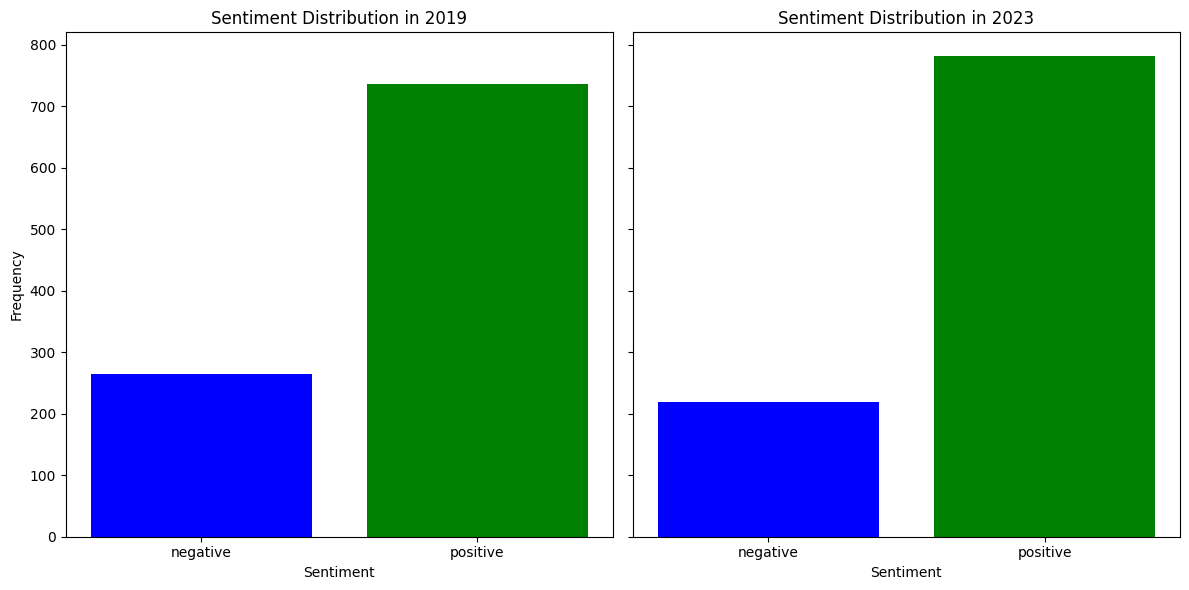

In [18]:
# Group by sentiment and count the occurrences for 2019
sentiment_counts_2019 = final_df_2019['sentiment'].value_counts().sort_index()

# Group by sentiment and count the occurrences for 2023
sentiment_counts_2023 = final_df_2023['sentiment'].value_counts().sort_index()

# Create histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for 2019
axs[0].bar(sentiment_counts_2019.index, sentiment_counts_2019.values, color=['blue', 'green'])
axs[0].set_title('Sentiment Distribution in 2019')
axs[0].set_xlabel('Sentiment')
axs[0].set_ylabel('Frequency')

# Plot for 2023
axs[1].bar(sentiment_counts_2023.index, sentiment_counts_2023.values, color=['blue', 'green'])
axs[1].set_title('Sentiment Distribution in 2023')
axs[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

### **BONUS: Sentiments by Neighborhood Over Time** 🏘️

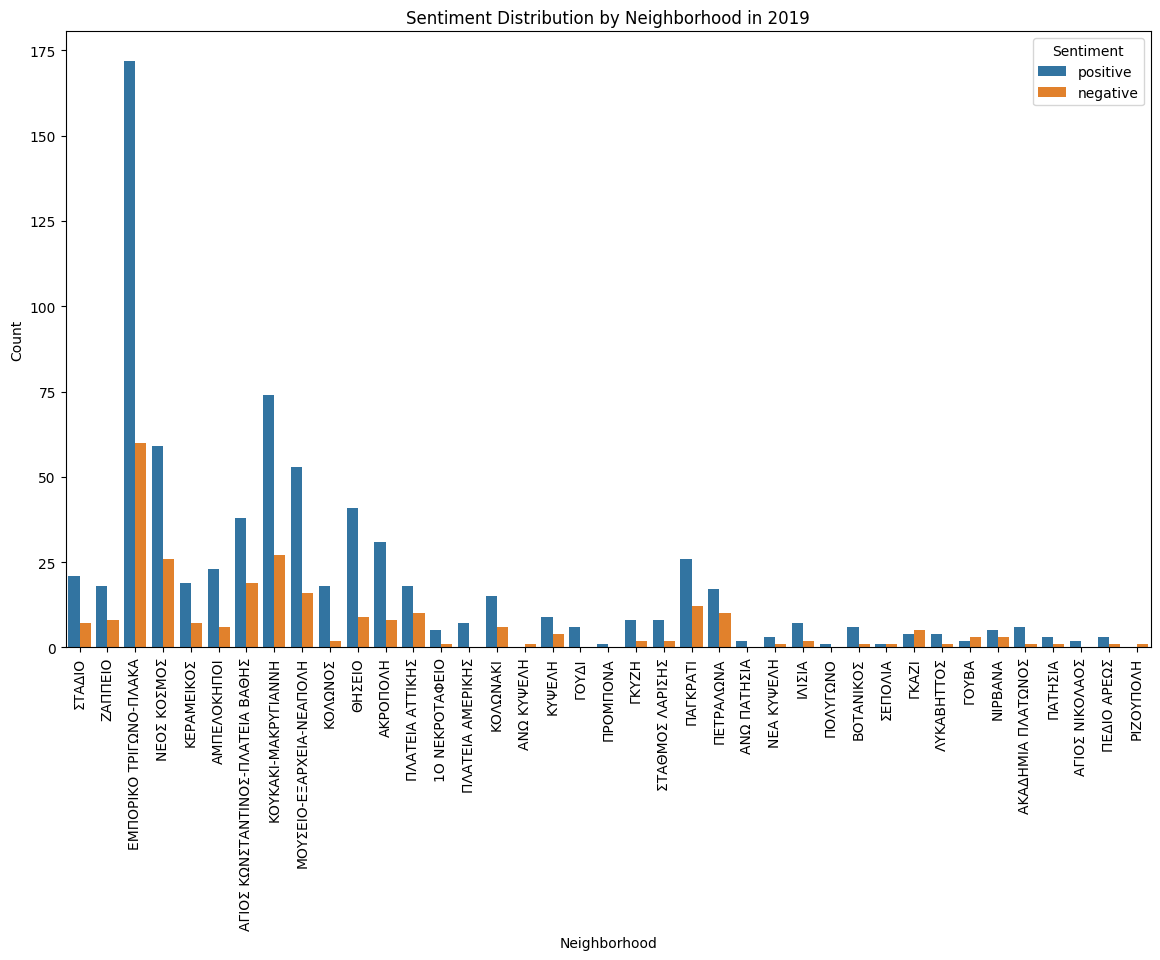

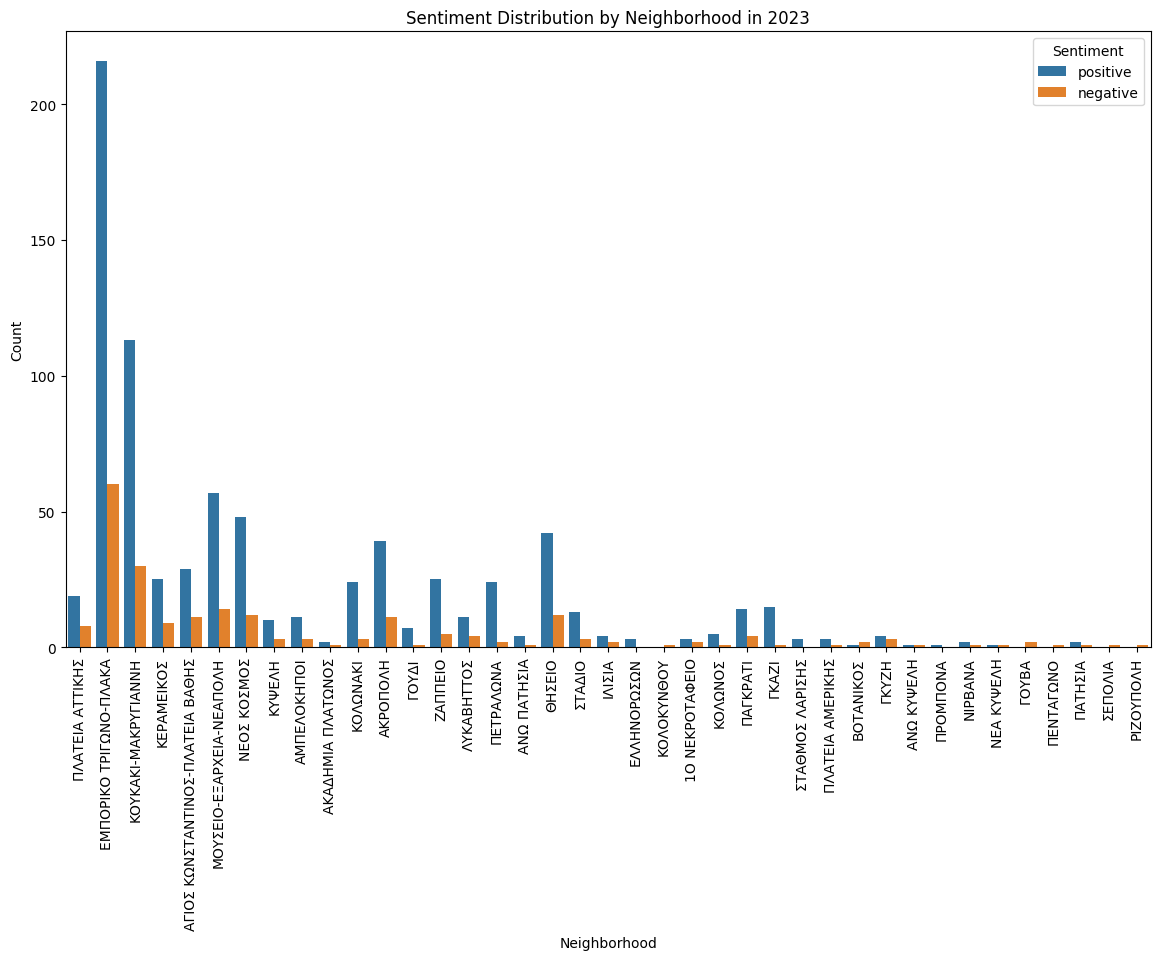

In [19]:
# Function to plot countplot by neighborhood and sentiment
def plot_sentiment_countplot(df, title):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=df, x='neighbourhood_cleansed', hue='sentiment')
    plt.title(title)
    plt.xlabel('Neighborhood')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Sentiment')
    plt.show()

# Plot for 2019
plot_sentiment_countplot(final_df_2019, 'Sentiment Distribution by Neighborhood in 2019')

# Plot for 2023
plot_sentiment_countplot(final_df_2023, 'Sentiment Distribution by Neighborhood in 2023')


### **Question 2**

📝 For the rest of the questions we decided to use the data only from the year of 2023 because it already contained all the data from the previous years.

#### **TF-IDF** 🔢

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=1, max_features=25, stop_words='english')
tfidf_vectors = tfidf_vectorizer.fit_transform(final_df_2023['comments'])
tfidf_vectors = tfidf_vectors.toarray()

In [21]:
print(tfidf_vectors.shape)
print(tfidf_vectors[0])

(1000, 25)
[0.         0.         0.56557188 0.         0.34266622 0.41952512
 0.         0.         0.         0.         0.26984892 0.
 0.         0.         0.4664145  0.         0.         0.
 0.         0.         0.         0.31039662 0.         0.
 0.        ]


#### **Word2Vec** 🔣

In [22]:
!pip install gensim

In [23]:
import gensim.models

tokenized_reviews = final_df_2023['comments'].apply(lambda x: x.split()) # tokenizing

features = 25

word2vec_model = gensim.models.Word2Vec(
                 tokenized_reviews,
                 vector_size = features, # number of features
                 window = 5,             # window size
                 min_count = 5,
                 sg = 1,                 # use skip-gram model
                 hs = 0,
                 negative = 10,          # for negative sampling
                 workers= 2,
                 seed = 34)

word2vec_model.train(tokenized_reviews, total_examples=len(final_df_2023['comments']), epochs=20)

(304969, 492160)

In [24]:
word2vec_model.wv.most_similar(positive="apartment")

[('clean', 0.890788197517395),
 ('complete', 0.8797799944877625),
 ('appartement', 0.8677659034729004),
 ('neat', 0.8572644591331482),
 ('accommodation', 0.8452299237251282),
 ('tidy', 0.8424186110496521),
 ('sparkling', 0.8418865203857422),
 ('alexandra', 0.8416557908058167),
 ('cozy', 0.8408034443855286),
 ('simple', 0.8345875144004822)]

In [25]:
# Function to average word vectors for a given comment
def comment_to_vector(comment, model, num_features):
    words = comment.split()
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model.wv:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

# Transform each comment to a vector
comment_vectors = np.array([comment_to_vector(comment, word2vec_model, features) for comment in final_df_2023['comments']])

#### **Dataset Split**

##### **TF-IDF** 🔢

In [26]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    tfidf_vectors,
    final_df_2023['sentiment'],
    test_size=0.2,
    random_state=42
)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train_tfidf.shape)
print("Test set shape:", X_test_tfidf.shape)
print("Training labels shape:", y_train_tfidf.shape)
print("Test labels shape:", y_test_tfidf.shape)

Training set shape: (800, 25)
Test set shape: (200, 25)
Training labels shape: (800,)
Test labels shape: (200,)


##### **Word2Vec** 🔣

In [27]:
# Split the data into training and test sets
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    comment_vectors,
    final_df_2023['sentiment'],
    test_size=0.2,
    random_state=42
)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train_w2v.shape)
print("Test set shape:", X_test_w2v.shape)
print("Training labels shape:", y_train_w2v.shape)
print("Test labels shape:", y_test_w2v.shape)

Training set shape: (800, 25)
Test set shape: (200, 25)
Training labels shape: (800,)
Test labels shape: (200,)


#### **Support Vector Machines** ↔️

##### **SVM with TF-IDF**  🔢

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Train the SVM model using 10-fold cross-validation
svm_classifier_tfidf = SVC(kernel='linear')
cv_scores_tfidf = cross_val_score(svm_classifier_tfidf, X_train_tfidf, y_train_tfidf, cv=10)

print("10-Fold Cross-Validation Scores (TF-IDF):", cv_scores_tfidf)
print("Mean CV Score (TF-IDF):", np.mean(cv_scores_tfidf))

# Train the final model on the training set
svm_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Make predictions
y_pred_tfidf = svm_classifier_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
classification_rep_tfidf = classification_report(y_test_tfidf, y_pred_tfidf)

print("Accuracy (TF-IDF):", accuracy_tfidf)
print("Classification Report (TF-IDF):\n", classification_rep_tfidf)

10-Fold Cross-Validation Scores (TF-IDF): [0.8    0.8    0.8    0.8    0.8    0.8    0.8    0.7875 0.7875 0.7875]
Mean CV Score (TF-IDF): 0.7962499999999999
Accuracy (TF-IDF): 0.72
Classification Report (TF-IDF):
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        56
    positive       0.72      1.00      0.84       144

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.52      0.72      0.60       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### **SVM with Word2Vec** 🔣

In [29]:
# Train the SVM model using 10-fold cross-validation
svm_classifier_w2v = SVC(kernel='linear')
cv_scores_w2v = cross_val_score(svm_classifier_w2v, X_train_w2v, y_train_w2v, cv=10)

print("10-Fold Cross-Validation Scores (Word2Vec):", cv_scores_w2v)
print("Mean CV Score (Word2Vec):", np.mean(cv_scores_w2v))

# Train the final model on the training set
svm_classifier_w2v.fit(X_train_w2v, y_train_w2v)

# Make predictions
y_pred_w2v = svm_classifier_w2v.predict(X_test_w2v)

# Evaluate the model
accuracy_w2v = accuracy_score(y_test_w2v, y_pred_w2v)
classification_rep_w2v = classification_report(y_test_w2v, y_pred_w2v)

print("Accuracy (Word2Vec):", accuracy_w2v)
print("Classification Report (Word2Vec):\n", classification_rep_w2v)

10-Fold Cross-Validation Scores (Word2Vec): [0.85   0.7875 0.825  0.8125 0.7875 0.825  0.8375 0.7875 0.825  0.8   ]
Mean CV Score (Word2Vec): 0.81375
Accuracy (Word2Vec): 0.785
Classification Report (Word2Vec):
               precision    recall  f1-score   support

    negative       0.84      0.29      0.43        56
    positive       0.78      0.98      0.87       144

    accuracy                           0.79       200
   macro avg       0.81      0.63      0.65       200
weighted avg       0.80      0.79      0.74       200



#### **Random Forests** 🌳

##### **Random Forests with TF-IDF** 🔢

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
cv_scores_tfidf = cross_val_score(rf_classifier_tfidf, X_train_tfidf, y_train_tfidf, cv=10)

print("10-Fold Cross-Validation Scores (TF-IDF):", cv_scores_tfidf)
print("Mean CV Score (TF-IDF):", np.mean(cv_scores_tfidf))

# Train the final model on the training set
rf_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Make predictions
y_pred_tfidf = rf_classifier_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
classification_rep_tfidf = classification_report(y_test_tfidf, y_pred_tfidf)

print("Accuracy (TF-IDF):", accuracy_tfidf)
print("Classification Report (TF-IDF):\n", classification_rep_tfidf)

10-Fold Cross-Validation Scores (TF-IDF): [0.775  0.8    0.7875 0.775  0.7375 0.7625 0.7625 0.7875 0.7875 0.7625]
Mean CV Score (TF-IDF): 0.7737499999999999
Accuracy (TF-IDF): 0.715
Classification Report (TF-IDF):
               precision    recall  f1-score   support

    negative       0.43      0.05      0.10        56
    positive       0.73      0.97      0.83       144

    accuracy                           0.71       200
   macro avg       0.58      0.51      0.46       200
weighted avg       0.64      0.71      0.62       200



##### **Random Forests with Word2Vec** 🔣

In [31]:
# Initialize the Random Forest classifier
rf_classifier_w2v = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
cv_scores_w2v = cross_val_score(rf_classifier_w2v, X_train_w2v, y_train_w2v, cv=10)

print("10-Fold Cross-Validation Scores (Word2Vec):", cv_scores_w2v)
print("Mean CV Score (Word2Vec):", np.mean(cv_scores_w2v))

# Train the final model on the training set
rf_classifier_w2v.fit(X_train_w2v, y_train_w2v)

# Make predictions
y_pred_w2v = rf_classifier_w2v.predict(X_test_w2v)

# Evaluate the model
accuracy_w2v = accuracy_score(y_test_w2v, y_pred_w2v)
classification_rep_w2v = classification_report(y_test_w2v, y_pred_w2v)

print("Accuracy (Word2Vec):", accuracy_w2v)
print("Classification Report (Word2Vec):\n", classification_rep_w2v)

10-Fold Cross-Validation Scores (Word2Vec): [0.825  0.775  0.875  0.85   0.7875 0.8125 0.8375 0.7625 0.8375 0.8125]
Mean CV Score (Word2Vec): 0.8175000000000001
Accuracy (Word2Vec): 0.795
Classification Report (Word2Vec):
               precision    recall  f1-score   support

    negative       0.80      0.36      0.49        56
    positive       0.79      0.97      0.87       144

    accuracy                           0.80       200
   macro avg       0.80      0.66      0.68       200
weighted avg       0.80      0.80      0.77       200



#### **K-Nearest Neighbors** 🏠

##### **KNN with TF-IDF** 🔢

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier_tfidf = KNeighborsClassifier(n_neighbors=5)  # n_neighbors is the number of neighbors to use

# Perform 10-fold cross-validation
cv_scores_tfidf = cross_val_score(knn_classifier_tfidf, X_train_tfidf, y_train_tfidf, cv=10)

print("10-Fold Cross-Validation Scores (TF-IDF):", cv_scores_tfidf)
print("Mean CV Score (TF-IDF):", np.mean(cv_scores_tfidf))

# Train the final model on the training set
knn_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Make predictions
y_pred_tfidf = knn_classifier_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
classification_rep_tfidf = classification_report(y_test_tfidf, y_pred_tfidf)

print("Accuracy (TF-IDF):", accuracy_tfidf)
print("Classification Report (TF-IDF):\n", classification_rep_tfidf)

10-Fold Cross-Validation Scores (TF-IDF): [0.8    0.7875 0.75   0.7625 0.775  0.7625 0.775  0.725  0.75   0.7375]
Mean CV Score (TF-IDF): 0.7625
Accuracy (TF-IDF): 0.685
Classification Report (TF-IDF):
               precision    recall  f1-score   support

    negative       0.27      0.07      0.11        56
    positive       0.72      0.92      0.81       144

    accuracy                           0.69       200
   macro avg       0.49      0.50      0.46       200
weighted avg       0.59      0.69      0.61       200



##### **KNN with Word2Vec** 🔣

In [33]:
# Initialize the KNN classifier
knn_classifier_w2v = KNeighborsClassifier(n_neighbors=5)  # n_neighbors is the number of neighbors to use

# Perform 10-fold cross-validation
cv_scores_w2v = cross_val_score(knn_classifier_w2v, X_train_w2v, y_train_w2v, cv=10)

print("10-Fold Cross-Validation Scores (Word2Vec):", cv_scores_w2v)
print("Mean CV Score (Word2Vec):", np.mean(cv_scores_w2v))

# Train the final model on the training set
knn_classifier_w2v.fit(X_train_w2v, y_train_w2v)

# Make predictions
y_pred_w2v = knn_classifier_w2v.predict(X_test_w2v)

# Evaluate the model
accuracy_w2v = accuracy_score(y_test_w2v, y_pred_w2v)
classification_rep_w2v = classification_report(y_test_w2v, y_pred_w2v)

print("Accuracy (Word2Vec):", accuracy_w2v)
print("Classification Report (Word2Vec):\n", classification_rep_w2v)

10-Fold Cross-Validation Scores (Word2Vec): [0.8125 0.8    0.825  0.825  0.75   0.775  0.8125 0.8    0.775  0.725 ]
Mean CV Score (Word2Vec): 0.79
Accuracy (Word2Vec): 0.755
Classification Report (Word2Vec):
               precision    recall  f1-score   support

    negative       0.60      0.38      0.46        56
    positive       0.79      0.90      0.84       144

    accuracy                           0.76       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.74      0.76      0.74       200




### **Question 3**

In [34]:
!pip install gensim

In [35]:
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

# Identify the top 300 most frequently used words
all_words = [word for review in tokenized_reviews for word in review]
word_freq = Counter(all_words)
top_300_words = [word for word, freq in word_freq.most_common(300)]

# Print the top 300 most used words
top_300_words_df = pd.DataFrame(top_300_words, columns=['Word'])
print("Top 300 most frequently used words:")
print(top_300_words_df)

csv_file_path = '/content/drive/My Drive/Datasets/top_300_words.csv'
top_300_words_df.to_csv(csv_file_path, index=False)

Top 300 most frequently used words:
              Word
0            great
1        apartment
2         location
3            place
4             stay
..             ...
295              4
296  communicative
297          spent
298           hope
299          clear

[300 rows x 1 columns]


In [36]:
# Load the top 300 words from CSV
csv_file_path = '/content/drive/My Drive/Datasets/top_300_words.csv'
loaded_top_300_words_df = pd.read_csv(csv_file_path)
loaded_top_300_words = loaded_top_300_words_df['Word'].tolist()

# Get the word vectors for the top 300 words
word_vectors = np.array([word2vec_model.wv[word] for word in loaded_top_300_words if word in word2vec_model.wv])

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(word_vectors)

similarity_df = pd.DataFrame(similarity_matrix, index=loaded_top_300_words, columns=loaded_top_300_words)

similarity_df.head()

,great,apartment,location,place,stay,athens,host,clean,everything,us,...,appartment,though,br,front,future,4,communicative,spent,hope,clear
great,1.000000,0.763177,0.651822,0.615423,0.590529,0.651446,0.664123,0.736184,0.624898,0.532105,...,0.664102,0.377925,0.438839,0.388604,0.508163,0.414568,0.554952,0.403075,0.415221,0.627673
apartment,0.763177,1.000000,0.804934,0.783674,0.648578,0.545299,0.692037,0.890788,0.715400,0.482796,...,0.763561,0.502728,0.520451,0.433037,0.447871,0.456254,0.484298,0.495064,0.326299,0.486366
location,0.651822,0.804934,1.000000,0.828632,0.674782,0.634847,0.695465,0.684071,0.684792,0.438004,...,0.689513,0.245871,0.297270,0.295394,0.541963,0.425179,0.456785,0.394540,0.405722,0.316166
place,0.615423,0.783674,0.828632,1.000000,0.728803,0.672956,0.738143,0.680826,0.687710,0.493494,...,0.744936,0.402978,0.296026,0.410656,0.678474,0.476071,0.543250,0.541325,0.636278,0.371085
stay,0.590529,0.648578,0.674782,0.728803,1.000000,0.720725,0.593808,0.557624,0.668650,0.484747,...,0.629558,0.365984,0.418236,0.281979,0.842597,0.390070,0.595417,0.530394,0.750629,0.475880


In [37]:
from numpy import dot, corrcoef

# Function to find the top N most similar words
def find_top_n_similar(word, similarity_df, N):
    if word not in similarity_df.index:
        return None
    similar_words = similarity_df[word].sort_values(ascending=False).index[1:N+1].tolist()
    return similar_words

### **(a) Semantic Neighborhood of Two Words**

In [38]:
# Function to calculate the semantic neighborhood of two words
def semantic_neighborhood(word1, word2, similarity_df, N=10):
    neighbors_word1 = find_top_n_similar(word1, similarity_df, N)
    neighbors_word2 = find_top_n_similar(word2, similarity_df, N)

    if neighbors_word1 is None or neighbors_word2 is None:
        return None  # Return None if any word is not in the vocabulary

    combined_neighbors = {
        'word1': word1,
        'neighbors_word1': neighbors_word1,
        'word2': word2,
        'neighbors_word2': neighbors_word2
    }
    return combined_neighbors

### **(b) Similarity of Two Words**

#### **(a) Maximum Similarity of Neighborhoods**


In [39]:
# Function to calculate the maximum similarity between neighborhoods of two words
def max_similarity_between_neighborhoods(word1, word2, similarity_df, N=10):
    neighborhoods = semantic_neighborhood(word1, word2, similarity_df, N)

    if neighborhoods is None:
        return None  # Return None if any word is not in the vocabulary

    max_similarity = 0
    for neighbor1 in neighborhoods['neighbors_word1']:
        for neighbor2 in neighborhoods['neighbors_word2']:
            similarity = similarity_df.loc[neighbor1, neighbor2]
            if similarity > max_similarity:
                max_similarity = similarity

    return max_similarity

#### **(b) Correlation of Neighborhood Similarities**


In [40]:
# Function to calculate the correlation of neighborhood similarities
def neighborhood_similarity_correlation(word1, word2, similarity_df, N=10):
    neighborhoods = semantic_neighborhood(word1, word2, similarity_df, N)

    if neighborhoods is None:
        return None  # Return None if any word is not in the vocabulary

    similarities_word1 = []
    similarities_word2 = []

    # Calculate similarities within each neighborhood
    for neighbor1 in neighborhoods['neighbors_word1']:
        similarities_word1.append(similarity_df.loc[word1, neighbor1])

    for neighbor2 in neighborhoods['neighbors_word2']:
        similarities_word2.append(similarity_df.loc[word2, neighbor2])

    max_length = max(len(similarities_word1), len(similarities_word2))
    similarities_word1 += [0] * (max_length - len(similarities_word1))
    similarities_word2 += [0] * (max_length - len(similarities_word2))

    if len(similarities_word1) == 0 or len(similarities_word2) == 0:
        return None  # Return None if there are no similarities to compare

    correlation_matrix = np.corrcoef(similarities_word1, similarities_word2)
    correlation = correlation_matrix[0, 1]

    return correlation

#### **(c) Sum of Squared Neighborhood Similarities**


In [41]:
# Function to calculate the sum of squared neighborhood similarities
def sum_of_squared_neighborhood_similarities(word1, word2, similarity_df, N=10):
    neighborhoods = semantic_neighborhood(word1, word2, similarity_df, N)

    if neighborhoods is None:
        return None  # Return None if any word is not in the vocabulary

    sum_of_squares = 0

    for neighbor1 in neighborhoods['neighbors_word1']:
        for neighbor2 in neighborhoods['neighbors_word2']:
            similarity = similarity_df.loc[neighbor1, neighbor2]
            sum_of_squares += similarity ** 2

    return sum_of_squares

**How much does each similarity increase or decrease if we change the parameter N (neighborhood size)?**


In [42]:
# Example usage with different values of N
word1 = 'stay'
word2 = 'place'

# Call all functions for different values of N
N_values = [5, 10, 15, 20]

for N in N_values:
    print(f"Results for N = {N}:")
    max_similarity = max_similarity_between_neighborhoods(word1, word2, similarity_df, N)
    print(f"Maximum similarity between neighborhoods of '{word1}' and '{word2}': {max_similarity}")

    correlation = neighborhood_similarity_correlation(word1, word2, similarity_df, N)
    print(f"Correlation of neighborhood similarities between '{word1}' and '{word2}': {correlation}")

    sum_of_squares = sum_of_squared_neighborhood_similarities(word1, word2, similarity_df, N)
    print(f"Sum of squared neighborhood similarities between '{word1}' and '{word2}': {sum_of_squares}")
    print("\n")

Results for N = 5:
Maximum similarity between neighborhoods of 'stay' and 'place': 0.7733097672462463
Correlation of neighborhood similarities between 'stay' and 'place': 0.9388080200818943
Sum of squared neighborhood similarities between 'stay' and 'place': 8.373325893457134


Results for N = 10:
Maximum similarity between neighborhoods of 'stay' and 'place': 1.0
Correlation of neighborhood similarities between 'stay' and 'place': 0.9780728579781273
Sum of squared neighborhood similarities between 'stay' and 'place': 30.42241072414379


Results for N = 15:
Maximum similarity between neighborhoods of 'stay' and 'place': 1.0000001192092896
Correlation of neighborhood similarities between 'stay' and 'place': 0.9856134147451556
Sum of squared neighborhood similarities between 'stay' and 'place': 85.52771466414819


Results for N = 20:
Maximum similarity between neighborhoods of 'stay' and 'place': 1.0000001192092896
Correlation of neighborhood similarities between 'stay' and 'place': 0.97

📝 **Observations:**


1.  **Maximum Similarity Between Neighborhoods:**

  The maximum similarity between the neighborhoods of 'stay' and 'place' increases as *N* increases, but the rate of increase slows down after *N = 10*. This suggests that with a neighborhood size of 10 or more, the most similar pairs in the neighborhoods of 'stay' and 'place' are fully captured, and further increasing N does not reveal more similar pairs.

2.   **Correlation of Neighborhood Similarities:**

  The correlation of neighborhood similarities increases as
  *N* increases, indicating that the similarity patterns between the neighborhoods of 'stay' and 'place' become more aligned with larger neighborhood sizes. This trend suggests that larger values of *N* capture more comprehensive similarity patterns between the words.

3. **Sum of Squared Neighborhood Similarities:**
  The sum of squared neighborhood similarities increases significantly with larger values of *N*. This increase suggests that when additional neighbors are considered, they contribute significantly to the overall similarity.



**Example usage with different word pairs**

In [43]:
word_pairs = [('stay', 'apartment'), ('metro', 'walk'), ('friendly', 'kitchen')]
N = 10

for word1, word2 in word_pairs:
    print(f"Results for '{word1}' and '{word2} with N = {N}:")
    max_similarity = max_similarity_between_neighborhoods(word1, word2, similarity_df, N)
    print(f"Maximum similarity between neighborhoods of '{word1}' and '{word2}': {max_similarity}")

    correlation = neighborhood_similarity_correlation(word1, word2, similarity_df, N)
    print(f"Correlation of neighborhood similarities between '{word1}' and '{word2}': {correlation}")

    sum_of_squares = sum_of_squared_neighborhood_similarities(word1, word2, similarity_df, N)
    print(f"Sum of squared neighborhood similarities between '{word1}' and '{word2}': {sum_of_squares}\n")

Results for 'stay' and 'apartment with N = 10:
Maximum similarity between neighborhoods of 'stay' and 'apartment': 0.6714086532592773
Correlation of neighborhood similarities between 'stay' and 'apartment': 0.9377772067115407
Sum of squared neighborhood similarities between 'stay' and 'apartment': 18.2905123594641

Results for 'metro' and 'walk with N = 10:
Maximum similarity between neighborhoods of 'metro' and 'walk': 1.0000001192092896
Correlation of neighborhood similarities between 'metro' and 'walk': 0.866226414384265
Sum of squared neighborhood similarities between 'metro' and 'walk': 50.79209321928842

Results for 'friendly' and 'kitchen with N = 10:
Maximum similarity between neighborhoods of 'friendly' and 'kitchen': 0.7365956902503967
Correlation of neighborhood similarities between 'friendly' and 'kitchen': 0.9408031981360842
Sum of squared neighborhood similarities between 'friendly' and 'kitchen': 23.467660836450403

